#### Análise exploratória dos dados

1. Bibliotecas utilizadas

In [33]:
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib

2. Leitura do dataset utilizado

In [2]:
df_sentimentos = pd.read_csv("./data/data.csv",sep=",",encoding="utf-8")
df_sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


3. extraindo algumas infos

In [3]:
# Visualizando os dados de forma aleatória
display(df_sentimentos.sample(10))

,Sentence,Sentiment
1186,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",neutral
4005,$BWLD bearish engulfing candle,negative
2914,Finnish M-real 's Kyro mill is starting negoti...,neutral
2226,More than a third of the original participants...,negative
3728,Return on capital employed rose by 4.8 percent...,positive
4769,Activision Blizzard Media Networks Announces R...,positive
4297,Finnish consulting and engineering group Poyry...,positive
3876,The annual net sales of the unit is some EUR 5...,neutral
5112,"Of these shares 14,747,084 are held by the Com...",neutral
4899,Finnair PLC carried a record 8.8 million passe...,positive


In [4]:
# Visualizando informações gerais sobre o dataset
df_sentimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
# Visualizando a distribuição dos dados
colunas = list(df_sentimentos.columns)
for coluna in colunas:
	print(f"Distribuição da coluna {coluna}")
	print(df_sentimentos[coluna].value_counts())
	print("\n")

Distribuição da coluna Sentence
Sentence
Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .                                                          2
Scanfil , a systems supplier and contract manufacturer to the communications sector , will give notice to 20 productional employees , and temporarily lay off 15 employees at the company 's plant in Sievi , in Finland .    2
Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before .                                                                                                                                               2
Pretax loss totalled EUR 49.9 mn , compared to a loss of EUR 15.4 mn in the corresponding period in 2008 .                                                                                                                    2
Operating loss of the Pulp & Paper Machinery unit was over EUR 

In [6]:
# Tamanho do dataset
print("Tamanho do dataset")
print("Quantidade de linhas: ", df_sentimentos.shape[0])
print("Quantidade de colunas: ", df_sentimentos.shape[1])

Tamanho do dataset
Quantidade de linhas:  5842
Quantidade de colunas:  2


In [7]:
# Visualizando a quantidade de dados faltantes
print("Dados faltantes: ")
print(df_sentimentos.isnull().sum())

Dados faltantes: 
Sentence     0
Sentiment    0
dtype: int64


In [8]:
# Ver estatísticas descritivas do datasetp
print(df_sentimentos.describe())

                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130


In [9]:
#valores duplicados
print("Valores duplicados: ")
df_sentimentos_duplicados = df_sentimentos[df_sentimentos.duplicated()]
display(df_sentimentos_duplicados)
# Dropando valores duplicados
print("Dropando valores duplicados: ")
df_sentimentos_clean = df_sentimentos.drop_duplicates()
display(df_sentimentos_clean)

Valores duplicados: 


,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


Dropando valores duplicados: 


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [10]:
# pegando os dados duplicados e vendo que algumas sentencas estão com sentimentos diferentes
df_sentimentos_duplicados = df_sentimentos_clean[df_sentimentos_clean.duplicated(subset=['Sentence'], keep=False)]
df_sentimentos_duplicados_ordenados = df_sentimentos_duplicados.sort_values(by='Sentence')
display(df_sentimentos_duplicados_ordenados)
print("Quantidade de sentimentos: ", df_sentimentos_duplicados_ordenados['Sentiment'].value_counts())

,Sentence,Sentiment
3685,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",negative
4578,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",neutral
1488,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",negative
3765,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",neutral
1051,"( ADP News ) - Feb 4 , 2009 - Finnish broadban...",negative
...,...,...
5612,down to EUR5 .9 m H1 '09 3 August 2009 - Finni...,neutral
904,in Finland Finnish pharmaceutical company Orio...,neutral
3368,in Finland Finnish pharmaceutical company Orio...,negative
3075,stores 16 March 2010 - Finnish stationery and ...,negative


Quantidade de sentimentos:  Sentiment
negative    514
neutral     514
Name: count, dtype: int64


In [11]:
#deixando somente os dados unicos
df_sentimentos_unicos = df_sentimentos_clean.drop_duplicates(subset=['Sentence'], keep=False)
df_sentimentos_unicos

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


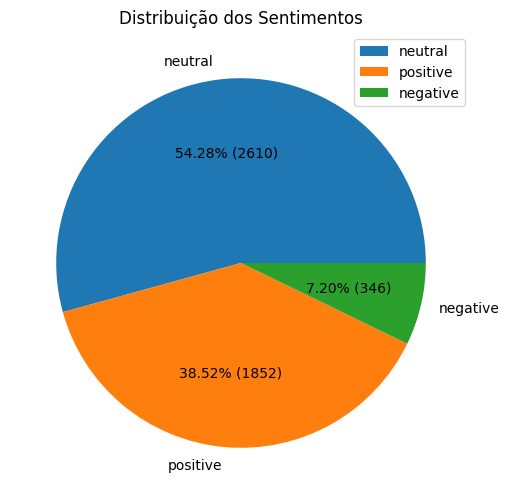

In [32]:
sentimentos_counts = df_sentimentos_unicos['Sentiment'].value_counts()
# Criar um gráfico de pizza
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sentimentos_counts, labels = sentimentos_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sentimentos_counts.sum()))
plt.title('Distribuição dos Sentimentos')
plt.legend(patches, sentimentos_counts.index, loc="best")
plt.show()

In [25]:
# Número total de palavras por sentenca
print("Número total de palavras por sentenca")
df_sentimentos_unicos['Sentence'].apply(lambda text: len(text.split()))

Número total de palavras por sentenca


0       32
1       11
2       39
3       20
4       23
        ..
5835    10
5836    18
5838    14
5839    16
5841    27
Name: Sentence, Length: 4808, dtype: int64

In [17]:
print("Exemplo: ",df_sentimentos_unicos['Sentence'].iloc[1])

Exemplo:  $ESI on lows, down $1.50 to $2.50 BK a real possibility


#### Tratamento dos dados

1. Importação das bibliotecas utilizadas no processo de tratamento dos dados

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

2. Downloads necessários

In [35]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/zairo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zairo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

3. Tratamento dos dados

In [37]:
# Definir o idioma das stopwords
stop_words = set(stopwords.words('english'))

In [45]:
# Função responsável por remover as stopwords e tokenizar o texto
def remove_stopwords_tokenize(texto):
	palavras = word_tokenize(texto)
	palavras_sem_stopwords = [palavra.lower() for palavra in palavras if palavra not in stop_words]
	return " ".join(palavras_sem_stopwords)

In [46]:
df_sentimentos_unicos

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [47]:
df_sentimentos_unicos2 = df_sentimentos_unicos.copy()
df_sentimentos_unicos2['Sentence'] = df_sentimentos_unicos2['Sentence'].apply(remove_stopwords_tokenize)

In [48]:
df_sentimentos_unicos2

,Sentence,Sentiment
0,the geosolutions technology leverage benefon '...,positive
1,"$ esi lows , $ 1.50 $ 2.50 bk real possibility",negative
2,"for last quarter 2010 , componenta 's net sale...",positive
3,"according finnish-russian chamber commerce , m...",neutral
4,the swedish buyout firm sold remaining 22.4 pe...,neutral
...,...,...
5835,hsbc says unit book $ 585 million charge settl...,negative
5836,daily mail parent company talks potential part...,positive
5838,nordic walking first used summer training meth...,neutral
5839,"according shipping company viking line , eu de...",neutral


In [49]:
def quebrar_sentencas(text):
    return nltk.sent_tokenize(text)

In [50]:
# Aplicar a função na coluna 'Sentence'
df_sentimentos_unicos2['Sentence_sents'] = df_sentimentos_unicos2['Sentence'].apply(quebrar_sentencas)

# Contar o número de sentenças em cada linha
df_sentimentos_unicos2['num_sentencas'] = df_sentimentos_unicos2['Sentence_sents'].apply(len)

# Filtrar e imprimir as linhas onde o número de sentenças é maior ou igual a 2
df_sentimentos_unicos2[df_sentimentos_unicos2['num_sentencas'] >= 2]

,Sentence,Sentiment,Sentence_sents,num_sentencas
11,$ sap q1 disappoints # software licenses . rea...,negative,"[$ sap q1 disappoints # software licenses ., r...",3
39,$ aapl afternoon selloff usual brutal . get re...,negative,"[$ aapl afternoon selloff usual brutal ., get ...",2
60,$ vips similar pattern like beginning may . di...,positive,"[$ vips similar pattern like beginning may ., ...",3
65,most bullish stocks twitter dip . $ yhoo $ gdx...,positive,"[most bullish stocks twitter dip ., $ yhoo $ g...",2
121,name applicant : jot automation oyname invento...,neutral,[name applicant : jot automation oyname invent...,2
...,...,...,...,...
5797,`` low energy consumption flexible loading adv...,neutral,[`` low energy consumption flexible loading ad...,2
5808,"$ qcom the indicator rsi 50 , stands 56.1 , up...",positive,"[$ qcom the indicator rsi 50 , stands 56.1 , u...",2
5809,$ fb hitting everything sight.short . twtr,negative,"[$ fb hitting everything sight.short ., twtr]",2
5810,$ goog resistance turned support ? it,positive,"[$ goog resistance turned support ?, it]",2


In [55]:
df_sentimentos_unicos2.loc[11,'Sentence']

'$ sap q1 disappoints # software licenses . real problem ? # cloud growth trails $ msft $ orcl $ goog $ crm $ adbe https : //t.co/jndphllzq5'

In [56]:
for frase in df_sentimentos_unicos2.loc[11, 'Sentence_sents']:
    print(frase)

$ sap q1 disappoints # software licenses .
real problem ?
# cloud growth trails $ msft $ orcl $ goog $ crm $ adbe https : //t.co/jndphllzq5


In [57]:
df_sentimentos_unicos2

,Sentence,Sentiment,Sentence_sents,num_sentencas
0,the geosolutions technology leverage benefon '...,positive,[the geosolutions technology leverage benefon ...,1
1,"$ esi lows , $ 1.50 $ 2.50 bk real possibility",negative,"[$ esi lows , $ 1.50 $ 2.50 bk real possibility]",1
2,"for last quarter 2010 , componenta 's net sale...",positive,"[for last quarter 2010 , componenta 's net sal...",1
3,"according finnish-russian chamber commerce , m...",neutral,"[according finnish-russian chamber commerce , ...",1
4,the swedish buyout firm sold remaining 22.4 pe...,neutral,[the swedish buyout firm sold remaining 22.4 p...,1
...,...,...,...,...
5835,hsbc says unit book $ 585 million charge settl...,negative,[hsbc says unit book $ 585 million charge sett...,1
5836,daily mail parent company talks potential part...,positive,[daily mail parent company talks potential par...,1
5838,nordic walking first used summer training meth...,neutral,[nordic walking first used summer training met...,1
5839,"according shipping company viking line , eu de...",neutral,"[according shipping company viking line , eu d...",1
